In [1]:
__author__ = "Sreejith Sreekumar"
__email__ = "sreekumar.s@husky.neu.edu"
__version__ = "0.0.1"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%debug

import warnings
warnings.filterwarnings('ignore')

ERROR:root:No traceback has been produced, nothing to debug.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.metrics import make_scorer
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
data_path = "../data/winemag-data_first150k.csv"
data = pd.read_csv(data_path)

In [5]:
data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


__Visualization1: What is the average wine price per country?__

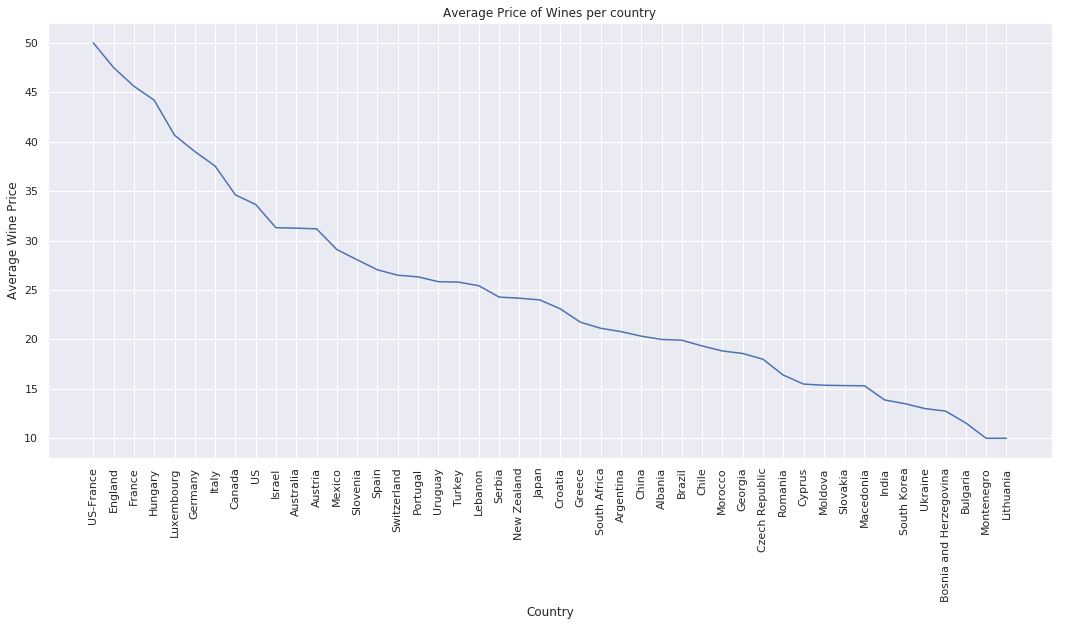

In [6]:
grouped_avg_price = data.groupby("country")["price"].mean().reset_index(name="average_price")
grouped_avg_price = grouped_avg_price.sort_values(by="average_price", ascending=False)
grouped_avg_price = grouped_avg_price.dropna()
f = plt.figure(figsize=(18,8))
ax = f.add_subplot(111)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

ax.set_xlabel("Country")
ax.set_ylabel("Average Wine Price")
ax.set_title("Average Price of Wines per country")
ax.plot(grouped_avg_price["country"], grouped_avg_price["average_price"])

__How do points vary with price in the US?__

In [10]:

data_us = data[data.country == "US"]

# Create a trace
trace = go.Scatter(
    x = data_us["points"],
    y = data_us["price"],
    mode = 'markers',
    text = data_us['designation']
)

_data = [trace]

layout = go.Layout(
    title='Variation of Points to Prices in locations in the US',
    
    xaxis=dict(
        title='Points',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Plot and embed in ipython notebook!
py.iplot(_data, filename='basic-scatter')

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/usr/local/lib/python3.6/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


The draw time for this plot will be slow for clients without much RAM.


/usr/local/lib/python3.6/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow

